# Breast Cancer Detection

*Author: Eda AYDIN*

## Import libraries

In [1]:
!pip install opendatasets --upgrade --quiet
!pip install pandas-profiling --upgrade --quiet

In [2]:
!conda update --all --quiet

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
# Import libraries
import opendatasets as od

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import sys

# Data science tools
import pandas as pd
import numpy as np
import scipy as sp
import psutil, os
from pandas_profiling import ProfileReport

# Scikit-learn library
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.image as mimg # images
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix


## Getting Data

### Data Set Information

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link](http://www.cs.wisc.edu/~street/images/)

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

### Attribute Information

1) ID Number
2) Dianosis ( M = Malignant, B = Benign)

Ten real-valued features are computed for each cell nucleus:

1) radius (mean of distances from center to points on the perimeter)
2) texture (standard deviation of gray-scale values)
3) perimeter
4) area
5) smoothness (local variation in radius lengths)
6) compactness (perimeter^2 / area - 1.0)
7) concavity (severity of concave portions of the contour)
8) concave points (number of concave portions of the contour)
9) symmetry
10) fractal dimension ("coastline approximation" - 1)

In [4]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

In [5]:
names =["id" ,"clump_thickness", "uniform_cell_size", "uniform_cell_shape", "marginal_adhesion", "single_epithelial_size", "bare_nuclei", "bland_chromaton", "normal_nucleoli", "nutises", "class"]

In [6]:
df = pd.read_csv(url, names=names)

There are some steps to be considere:

* First, our dataset contains some missing data. To deal with this we will add a df.replace method
* If dp.replace method give us a question mark. It means that there is no data there. We are simply going to  input the value -999999 and tell python to ignore that data

* We will them perform the print (df.axes) operation so that we can see the columns. We can see that we ahve seen 699 different data points  and each of those cases has 11 different columns.
* Next, we will print the shape of the dataset using the print(df.shape) operation.

In [7]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromaton,normal_nucleoli,nutises,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
df.describe(include = "all")

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromaton,normal_nucleoli,nutises,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


## Data Preprocessing

In [9]:
# A Code part from Notebook of Caglar Subası
def MissingUniqueStatistics(df):

    import io
    import pandas as pd
    import psutil
    import os
    import gc
    import time
    import seaborn as sns
    from IPython.display import display, HTML
    # pd.set_option('display.max_colwidth', -1)
    from io import BytesIO
    import base64

    print("MissingUniqueStatistics process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()

    variable_name_list = []
    total_entry_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    mean_list = []
    std_list = []
    min_list = []
    Q1_list = []
    Q2_list = []
    Q3_list = []
    max_list = []

    df_statistics = df.describe().copy()

    for col in df.columns:

        variable_name_list.append(col)
        total_entry_list.append(df.loc[:, col].shape[0])
        data_type_list.append(df.loc[:, col].dtype)
        unique_values_list.append(list(df.loc[:, col].unique()))
        number_of_unique_values_list.append(len(list(df.loc[:, col].unique())))
        missing_value_number_list.append(df.loc[:, col].isna().sum())
        missing_value_ratio_list.append(
            round((df.loc[:, col].isna().sum()/df.loc[:, col].shape[0]), 4))

        try:
            mean_list.append(df_statistics.loc[:, col][1])
            std_list.append(df_statistics.loc[:, col][2])
            min_list.append(df_statistics.loc[:, col][3])
            Q1_list.append(df_statistics.loc[:, col][4])
            Q2_list.append(df_statistics.loc[:, col][5])
            Q3_list.append(df_statistics.loc[:, col][6])
            max_list.append(df_statistics.loc[:, col][7])
        except:
            mean_list.append('NaN')
            std_list.append('NaN')
            min_list.append('NaN')
            Q1_list.append('NaN')
            Q2_list.append('NaN')
            Q3_list.append('NaN')
            max_list.append('NaN')

    data_info_df = pd.DataFrame({'Variable': variable_name_list,
                                '#_Total_Entry': total_entry_list,
                                 '#_Missing_Value': missing_value_number_list,
                                 '%_Missing_Value': missing_value_ratio_list,
                                 'Data_Type': data_type_list,
                                 'Unique_Values': unique_values_list,
                                 '#_Unique_Values': number_of_unique_values_list,
                                 'Mean': mean_list,
                                 'STD': std_list,
                                 'Min': min_list,
                                 'Q1': Q1_list,
                                 'Q2': Q2_list,
                                 'Q3': Q3_list,
                                 'Max': max_list
                                 })

    data_info_df = data_info_df.set_index("Variable", inplace=False)

    # data_info_df['pdf'] = np.nan
    # for col in data_info_df.index:
    #   data_info_df.loc[col,'pdf'] = mapping(col)

    print('MissingUniqueStatistics process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    # , HTML(df.to_html(escape=False, formatters=dict(col=mapping)))
    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)

In [10]:
data_info = MissingUniqueStatistics(df)
data_info["Variable Structure"] = ["Cardinal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal","Nominal"]
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.0005329529444376628 minutes ---


,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Mean,STD,Min,Q1,Q2,Q3,Max,Variable Structure
Variable,,,,,,,,,,,,,,
id,699,0,0.0,int64,"[1000025, 1002945, 1015425, 1016277, 1017023, ...",645,1071704.098712,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0,Cardinal
clump_thickness,699,0,0.0,int64,"[5, 3, 6, 4, 8, 1, 2, 7, 10, 9]",10,4.41774,2.815741,1.0,2.0,4.0,6.0,10.0,Nominal
uniform_cell_size,699,0,0.0,int64,"[1, 4, 8, 10, 2, 3, 7, 5, 6, 9]",10,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0,Nominal
uniform_cell_shape,699,0,0.0,int64,"[1, 4, 8, 10, 2, 3, 5, 6, 7, 9]",10,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0,Nominal
marginal_adhesion,699,0,0.0,int64,"[1, 5, 3, 8, 10, 4, 6, 2, 9, 7]",10,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0,Nominal
single_epithelial_size,699,0,0.0,int64,"[2, 7, 3, 1, 6, 4, 5, 8, 10, 9]",10,3.216023,2.2143,1.0,2.0,2.0,4.0,10.0,Nominal
bare_nuclei,699,0,0.0,object,"[1, 10, 2, 4, 3, 9, 7, ?, 5, 8, 6]",11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nominal
bland_chromaton,699,0,0.0,int64,"[3, 9, 1, 2, 4, 5, 7, 8, 6, 10]",10,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0,Nominal
normal_nucleoli,699,0,0.0,int64,"[1, 2, 7, 4, 5, 3, 10, 6, 9, 8]",10,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0,Nominal


### Missing Data Hnadling

There are some steps to be considered

* First, our dataset contains some missing data. To deal with we will add **df.replace** method.
* If df.replace method gives us a question mark, it means that there is no data there. We are simply going to input the value -999999 and tell python to ignore that data.
* We will perform the **print(df.axes)** operation so that we can see the columns. We can see that we have 696 different data points and each of those cases has 11 different columns.
* Next, we will print the shape of the dataset using the **print(df.shape)** operation

In [11]:
# preprocess the data
df.replace("?",-999999, inplace = True)
print(df.axes)
df.drop(["id"],1, inplace = True)

# print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromaton', 'normal_nucleoli', 'nutises', 'class'],
      dtype='object')]
(699, 10)


We can detect whether the tumor is benign (which means it is non-cancerous) or malignant (which means i is cancerous)

## Data Visualizations

We will visualize the parameters of the dataset 

* We will print the first point so that we can see what it entails.
* We have a value of between 0 and 10 in all the different columns. In the class column, the number of 2 represents a benign tumor and the number 4 represents a malignant tumor.
* There are 699 cells in the datasets.
* The next step will be to do a print.describe operation, which gives us the mean, standard deviation, and other aspects for each our different parameters or features.

In [15]:
# Do dataset visualization
df.loc[6]

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromaton            3
normal_nucleoli            1
nutises                    1
class                      2
Name: 6, dtype: object

In [14]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bland_chromaton,normal_nucleoli,nutises,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


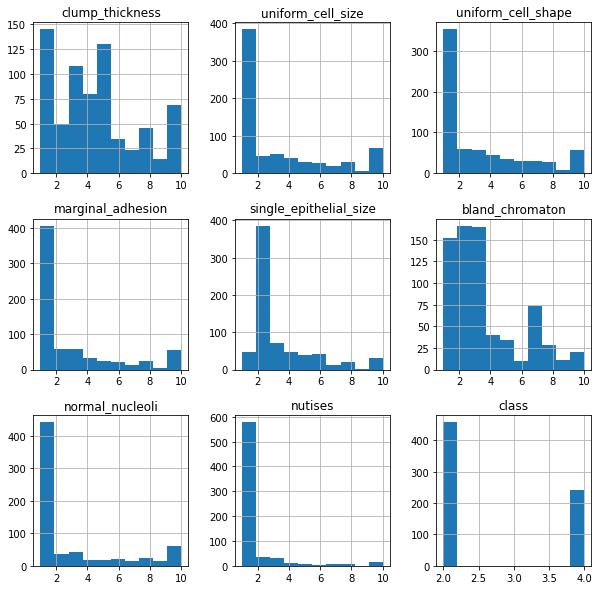

In [16]:
# plot histograms for each variable
df.hist(figsize=(10,10))
plt.show()

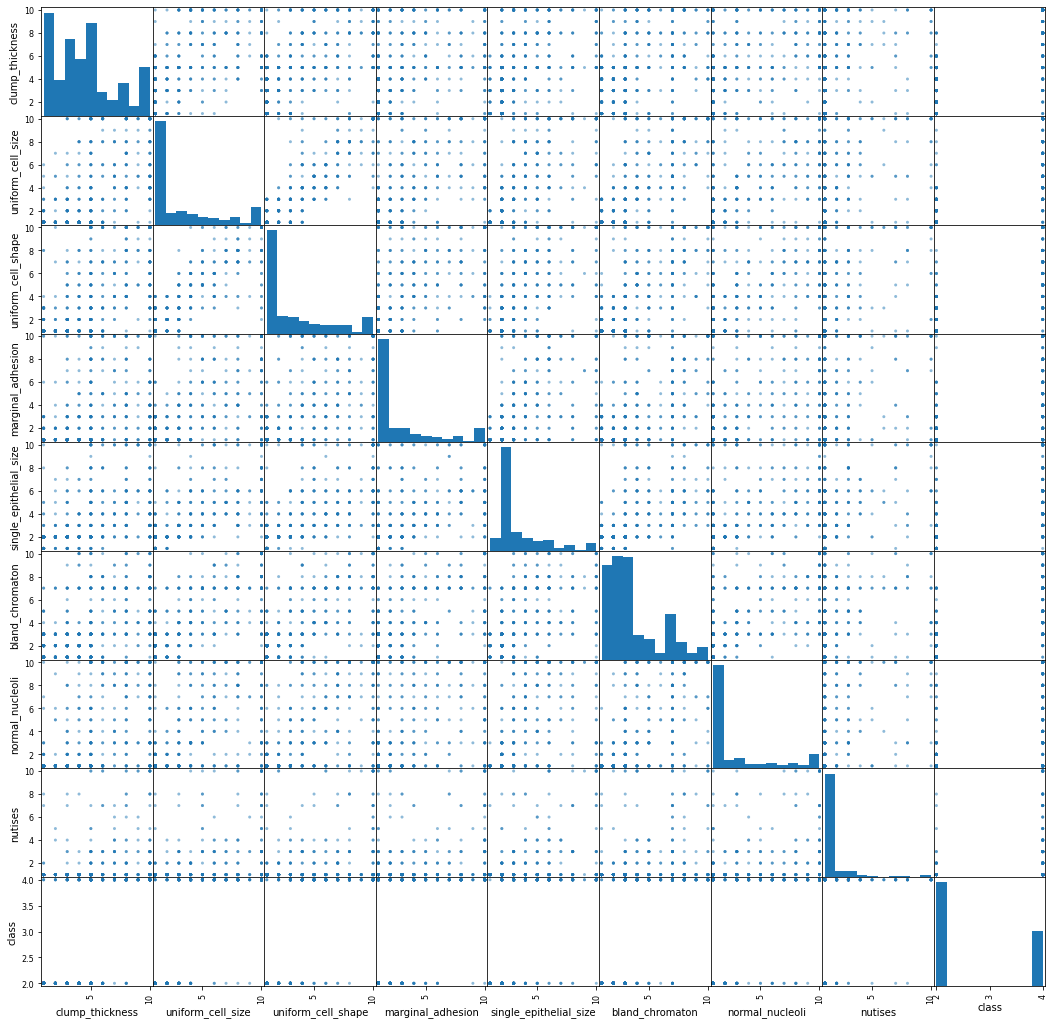

In [17]:
scatter_matrix(df, figsize=(18,18))
plt.show()

There are some steps will help you to better understand the machin learning algorithms:

1. The first step is that we need to perform is to split our dataset into X and y datasets for training. We will not train all of the variable data as we need to save some for our validation step. This will helps us to determine how well these algorithms can generalize to new data and not just how well they know the training data. Our X data will contain all of the variables expect for class column and our Y data is going to be class column which is the classification of whether a tumor is malignant or benign.
2. Next, we will use the **train_test_split** function and we will tthen split our data ito X_train, X_test, y_train and y_test.
3. In the same line we will add **model_selection**, **train_test_split** and x,y,test_size. About 20% of our data is fairly standard, so we will make the test size 0.2 to the test data.

In [18]:
# Create X and Y datasets for training
X = np.array(df.drop(["class"],1))
y = np.array(df["class"])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)


There are several steps tp actually dening the training models
1.   First, make an empty list, in which we will append the KNN model.
2.   Enter the KNeighborsClassifier function to explore the number of neighbors


*   Start with n_neighbors = 5 and play around with the variable a little to see how it changes our results
*   Next we will add our models: the SVM and the SVC. We will evaluate each model, in turn

*   The next stepp will be to get a reuslt list and a names list, so that we ca print out some of the information at the end
*   We will then perform a for loop for each of the models defined previously, such as name or model in models


*   W will also do a k-fold comparision which will run each of these a couple of times and then take the best results. The number of splits or n_splits, defines how many times it runs
*  Since we do not want a random state, we will go from the seed. now we will get our results


*   We will use the model_Seletion function that we imported previously and cross_val_score
*   For each model we will provide the training data to X_train and then y_train


*   We will also add the specification scoreing which was the accuracy that we added previously.
*   We will also append results, name, and we will print out a msg. We will then substitude some variables


*   Finally we will look at the mean results and standard deviation
*   A k-fold training will take place wich means that this will be run 10 times. We will receive the average result adn accruracy for each of them. We will use a randome seed of 8, so that it is consistent across different reails adn runs















In [34]:
models = []
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))
models.append(("SVC",SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = 8, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv= kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    
    msg = "{}: mean :{:.3f}  standard deviation:{:.3f}".format(str(name),cv_results.mean(), cv_results.std())
    print(msg)

KNN: mean :0.975  standard deviation:0.014
SVC: mean :0.655  standard deviation:0.050


* First we will make predictions on the validation sets with the y_test and X_test tthat we split out earlier.
* We will do another for loop in for name and model in models.
* Then we will do the model.fit and it will train it once again on the X and y training data.
* Since we want to make predictions we are going to use the model to actually make a prediciton about the X_test data.
* Once the model has been trained, we are going to use it to make a prediction. It will print out the name, the accruracy score (based on comparision of the y_test data with the predicrions we made), and classification_report which will tell us information about the false positives and negative that we found.

In [36]:
# Make predictions on validation dataset
for name,model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print("{}: {:.3f}".format(name, accuracy_score(y_test,predictions)))
    print(classification_report(y_test, predictions))

KNN: 0.943
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        92
           4       0.93      0.90      0.91        48

    accuracy                           0.94       140
   macro avg       0.94      0.93      0.94       140
weighted avg       0.94      0.94      0.94       140

SVC: 0.657
              precision    recall  f1-score   support

           2       0.66      1.00      0.79        92
           4       0.00      0.00      0.00        48

    accuracy                           0.66       140
   macro avg       0.33      0.50      0.40       140
weighted avg       0.43      0.66      0.52       140



C:\Users\choon\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\choon\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\choon\anaconda3\envs\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* **Accuracy** is the ratio of corrrectly predicted observation to the total obseravations.
* **Predicions (false positive)** is ratio of correctly predicted positive observations to the total predicted positive observations.
* **Recall (sensitivity) (false negative)** is ratio of correctly predicted positive observations to the all observations in actual class. 
* **f1-score** is the weighted average of precision and recall. Therefore, this score takes positive and negative.

Another example of predicting:

* First, we will make the KNeighborsClassifier and get an accuracy for it based on our testing data.
* Next, we will add an example. Type in np.array and pick whichever data points you want. 
* We will then take example and add reshape to it. We will flip it around so that we get a column vector.
* We will print our predictions

In [38]:
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)
print("Accuracy: {:.3f}".format(clf.score(X_test, y_test)))

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

Accuracy: 0.943
[2]
